Gold nano-sphere
============================

Comparing pyGDM to Mie theory for a gold nano-sphere (D=50nm).

Modules:

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt


## --- load pre-calculated Mie-data
wl_mie, qext_mie, qsca_mie = np.loadtxt("scat_mie_Au_D50nm.txt").T
qabs_mie = qext_mie - qsca_mie

Simulation setup
--------------------

/home/hans/.local/lib/python3.7/site-packages/pyGDM2-1.1rc1-py3.7-linux-x86_64.egg/pyGDM2/structures.py:154: UserWarning: Minimum structure Z-value lies below substrate level! Shifting structure bottom to Z=step/2.
  warnings.warn("Minimum structure Z-value lies below substrate level!" +
/home/hans/.local/lib/python3.7/site-packages/pyGDM2-1.1rc1-py3.7-linux-x86_64.egg/pyGDM2/visu.py:48: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


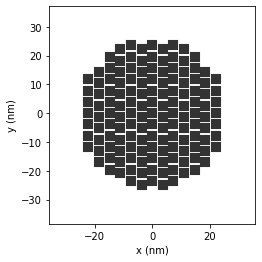

(hex) ----- N_dipoles = 1111

In [2]:
## --- Setup incident field
field_generator = fields.planewave
## log-interval spectrum (denser at low lambda):
wavelengths = np.exp(np.linspace(np.log(300), np.log(1000), 30))
kwargs = dict(theta = [0.0])
efield = fields.efield(field_generator, wavelengths=wavelengths, 
                                                   kwargs=kwargs)


## --- Setup geometry (sphere D=50nm in vacuum)
scale_factor = 1.38
step = 6.25/scale_factor
radius = 4.*scale_factor
geometry = structures.sphere(step, R=radius, mesh='hex', ORIENTATION=2)

material = materials.gold()
n1, n2 = 1.0, 1.0     # vacuum env.

struct = structures.struct(step, geometry, material, n1,n2, 
                                   structures.get_normalization('hex'))


sim = core.simulation(struct, efield)

visu.structure(sim)
print('(hex) ----- N_dipoles =', len(sim.struct.geometry), end='')

Run the simulation
--------------------------

In [3]:
## main simulation
E = core.scatter(sim, method='lu', verbose=True)

## extinction spectrum
field_kwargs = tools.get_possible_field_params_spectra(sim)[0]
wl, spec = tools.calculate_spectrum(sim, field_kwargs, linear.extinct)
a_ext, a_sca, a_abs = spec.T
a_geo = tools.get_geometric_cross_section(sim)

timing for wl=300.00nm - setup: 4366.5 ms, inv.: 1305.2 ms, repropa.: 12.1ms (1 field configs), tot: 5684.3 ms
timing for wl=312.72nm - setup: 3831.3 ms, inv.: 1308.2 ms, repropa.: 13.9ms (1 field configs), tot: 5161.1 ms
timing for wl=325.97nm - setup: 3673.5 ms, inv.: 1790.0 ms, repropa.: 12.5ms (1 field configs), tot: 5484.6 ms
timing for wl=339.79nm - setup: 2228.6 ms, inv.: 1569.2 ms, repropa.: 26.1ms (1 field configs), tot: 3841.9 ms
timing for wl=354.20nm - setup: 14881.8 ms, inv.: 1359.8 ms, repropa.: 11.6ms (1 field configs), tot: 16272.3 ms
timing for wl=369.21nm - setup: 4924.7 ms, inv.: 1211.5 ms, repropa.: 13.0ms (1 field configs), tot: 6156.6 ms
timing for wl=384.86nm - setup: 5454.6 ms, inv.: 1222.5 ms, repropa.: 13.6ms (1 field configs), tot: 6698.6 ms
timing for wl=401.17nm - setup: 3308.7 ms, inv.: 1130.7 ms, repropa.: 14.1ms (1 field configs), tot: 4461.9 ms
timing for wl=418.18nm - setup: 3628.2 ms, inv.: 1660.1 ms, repropa.: 25.3ms (1 field configs), tot: 5332.5 ms

/home/hans/.local/lib/python3.7/site-packages/pyGDM2-1.1rc1-py3.7-linux-x86_64.egg/pyGDM2/linear.py:105: UserWarning: Info: The fortran code underlying 'extinct' will be replaced by a python/numpy implementation in one of the next releases. The new implementation can be tested by using the `linear_py` instead of the `linear` module.
  "The new implementation can be tested by using the `linear_py` " +


Plot the spectrum
---------------------------

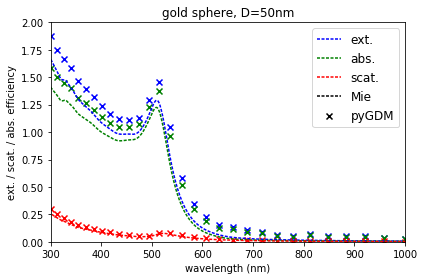

In [4]:
plt.figure()
plt.title("gold sphere, D=50nm")

## --- Mie
plt.plot(wl_mie, qext_mie, 'b--', dashes=[2,1],label='ext.')
plt.plot(wl_mie, qabs_mie, 'g--', dashes=[2,1],label='abs.')
plt.plot(wl_mie, qsca_mie, 'r--', dashes=[2,1],label='scat.')

## --- pyGDM
plt.scatter(wl, a_ext/a_geo, marker='x', linewidth=1.5, color='b', label='')
plt.scatter(wl, a_abs/a_geo, marker='x', linewidth=1.5, color='g', label='')
plt.scatter(wl, a_sca/a_geo, marker='x', linewidth=1.5, color='r', label='')

## --- for legend only
plt.plot([0], [0], 'k--', dashes=[2,1], label='Mie')
plt.scatter([0], [0], marker='x', linewidth=1.5, color='k', label='pyGDM')
## -- legend
plt.legend(loc='best', fontsize=12)


plt.xlabel("wavelength (nm)")
plt.ylabel("ext. / scat. / abs. efficiency")
plt.xlim( [wl.min(), wl.max()] )
plt.ylim( [0, 2] )


plt.tight_layout()
plt.show()

Except a slight offset in the extinction/absorption sections, the agreement with Mie theory is pretty nice. In particular, the plasmon resonance wavelength is reproduced with very good agreement.